**1. Download a small (5-15) set of variables of interest.**

In [ ]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige', 'year', 'wrkslf','industry', 'agewed'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

**2. Write a short description of the data you chose, and why. (1 page)**

Variables:

1. wrkstat (Work Status): This variable describes whether an individual is employed full-time, part-time, retired, unemployed, or in another status.
2. prestige (Occupational Prestige): Measures the perceived social status of an individual's occupation.
3. year: Indicates the year the survey was conducted, spanning from 1972 to 2022.
4. wrkslf (Self-Employed vs. Working for Someone Else): Identifies whether an individual is self-employed or works for someone else.
5. industry (Employment Industry): Categorizes the sector or field of work an individual is employed in (e.g., healthcare, technology, manufacturing).
6. agewed (Age When Married): Represents the age at which an individual first married.

Analyzing the relationships between these variables reveals several key insights about the evolving nature of work, society, and personal life choices. The combination of wrkstat, prestige, and wrkslf provides a comprehensive view of how work status and the pursuit of self-employment have changed over time. By examining employment trends from 1972 to 2022, we can understand how labor force participation—such as the shift from full-time to part-time work, or the rise of self-employment—correlates with broader socio-economic changes. For instance, a growing trend towards self-employment (wrkslf) may reflect the rise of the gig economy, while fluctuations in prestige can indicate changing societal values about certain occupations, from traditional office jobs to more flexible or entrepreneurial roles.

The industry variable further enriches this analysis by identifying how different sectors contribute to the shifting workforce. Emerging industries, such as technology and healthcare, are likely to provide more opportunities for self-employment, whereas traditional industries may see slower or more stable changes in work patterns. By analyzing industry-specific trends, we can see how job creation and opportunities in specific sectors impact labor choices and overall workforce dynamics.

Finally, agewed offers an intriguing perspective on how life milestones, such as marriage, intersect with career decisions. Individuals who marry later may demonstrate different employment patterns, such as a preference for self-employment or more career-focused goals. Understanding this relationship helps uncover how personal choices and work-related decisions are interconnected. Together, these variables offer a multidimensional view of the relationship between work, industry, societal values, and personal milestones, shedding light on the broader shifts in employment and the dynamics that shape economic behavior over time.


**3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('selected_gss_data.csv', low_memory=False)

# Replacing NaN values with 'missing' for categorical analysis
df = df.fillna('missing')

# Filter out rows where 'wrkstat' is 'missing' for the plot
df_filtered = df[df['wrkstat'] != 'missing']


**4. Produce some numeric summaries and visualizations. (1-3 pages)**


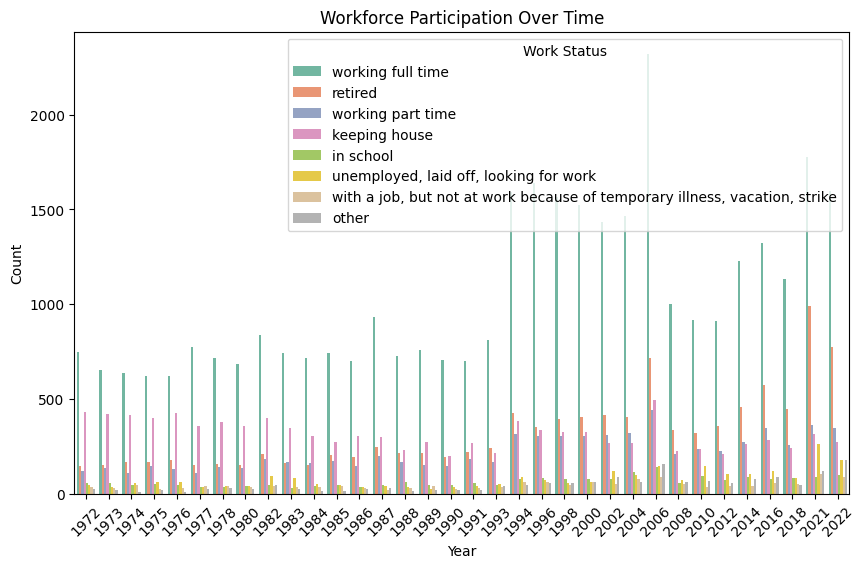

In [ ]:

# 1. Workforce Participation Over Time (Year vs. Work Status)
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='wrkstat', data=df_filtered, palette='Set2')
plt.title('Workforce Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Work Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

*Figure I*

This graph shows that the participation of the full time workforce increased steadily between 1972 and 1990, after which there was a spike in full time employment. Full time Employement continued to increase until 2008, after which there was a huge drop due to the 2008 recession. Since then it has been climbing steadily.


Top 10 Most Prestigious Industries in 1972:
industry
religious organizations                            64.5
offices of dentists                                61.0
elementary and secondary schools                   60.0
electric-gas utilities                             57.0
alcoholic beverages                                57.0
employment and temporary help agencies             56.0
miscellaneous professional and related services    56.0
theaters and motion pictures                       55.0
forestry                                           54.0
colleges and universities                          54.0
Name: prestige, dtype: float64


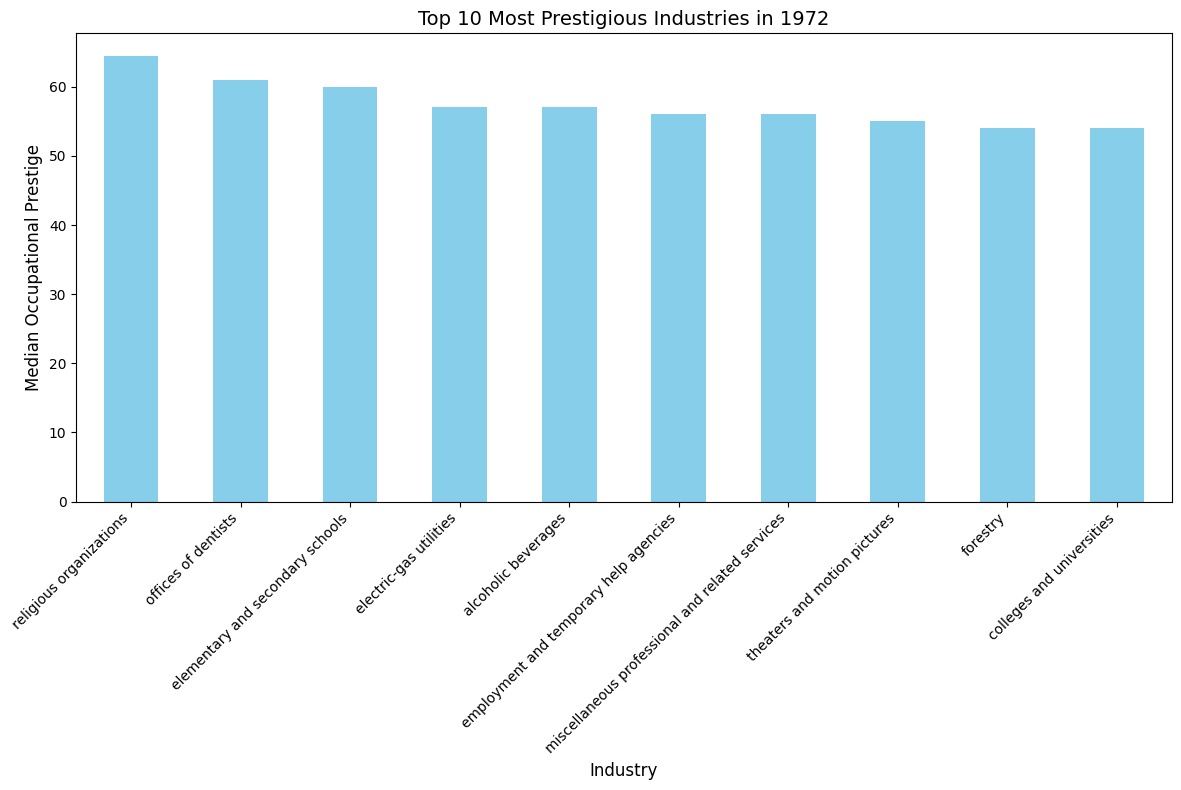

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('selected_gss_data.csv', low_memory=False)

# Replacing NaN values with 'missing' for categorical analysis
df = df.fillna('missing')

# Filter the data for 1972 and drop rows where 'prestige' or 'industry' is 'missing'
df_1972 = df[df['year'] == 1972].dropna(subset=['prestige', 'industry'])

# Convert 'prestige' to numeric, forcing errors to NaN (so 'missing' becomes NaN)
df_1972['prestige'] = pd.to_numeric(df_1972['prestige'], errors='coerce')

# Calculate the median prestige score for each industry in 1972
industry_prestige_1972 = df_1972.groupby('industry')['prestige'].median().sort_values(ascending=False)

# Get the top 10 industries by median prestige for 1972
top_10_1972 = industry_prestige_1972.head(10)

# Display the top 10 industries for 1972
print("\nTop 10 Most Prestigious Industries in 1972:")
print(top_10_1972)

# Create a plot to show the top 10 prestigious industries in 1972
plt.figure(figsize=(12, 8))
top_10_1972.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Prestigious Industries in 1972', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Median Occupational Prestige', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the layout to prevent clipping of labels
plt.show()



*Figure II*

This graph illustrates the top 10 most "prestigious" industries based on industry scores in 1972, reflecting how American values have evolved over time. In 1972, religious organizations, schools, and aid agencies were generally perceived as more altruistic, contributing to their higher prestige.

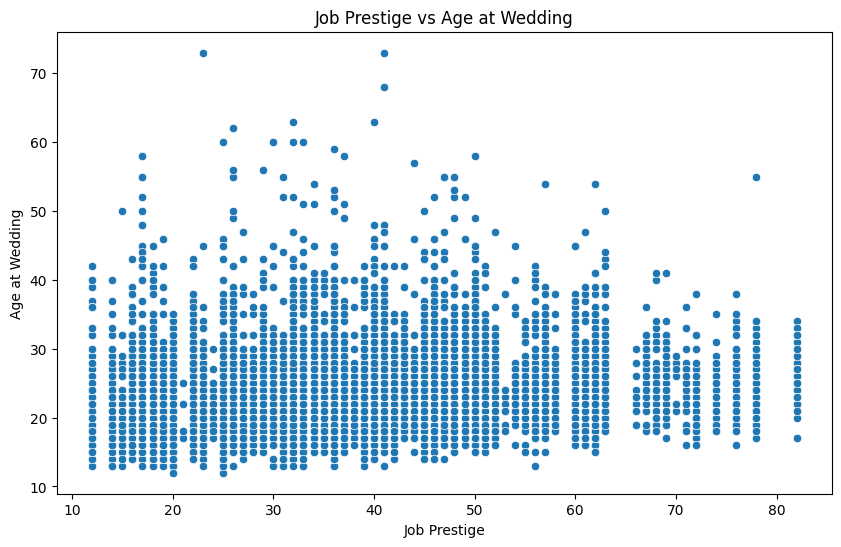

Correlation between Job Prestige and Age at Wedding: 0.15


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables you want to save
var_list = ['wrkstat', 'prestige', 'year', 'wrkslf', 'industry', 'agewed']

# Load the dataset
df = pd.read_csv('selected_gss_data.csv', usecols=var_list, low_memory=False)

# Replacing NaN values with 'missing' for categorical analysis
df = df.fillna('missing')

# Convert 'missing' string back to NaN for numeric columns (if any exist)
df[['prestige', 'agewed']] = df[['prestige', 'agewed']].apply(pd.to_numeric, errors='coerce')

# Filter out rows where 'wrkstat' is 'missing' for the plot
df_filtered = df[df['wrkstat'] != 'missing']

# Scatter plot of 'prestige' vs 'agewed'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='prestige', y='agewed')
plt.title('Job Prestige vs Age at Wedding')
plt.xlabel('Job Prestige')
plt.ylabel('Age at Wedding')
plt.show()

# Calculate the correlation between 'prestige' and 'agewed'
correlation = df_filtered[['prestige', 'agewed']].corr().iloc[0, 1]
print(f"Correlation between Job Prestige and Age at Wedding: {correlation:.2f}")



*Figure III*

When comparing job prestige vs age at wedding, we determine no strong correlation (0.15). It appears that there is no relationship between the age at which someone gets married and the prestige of the job they end up working.

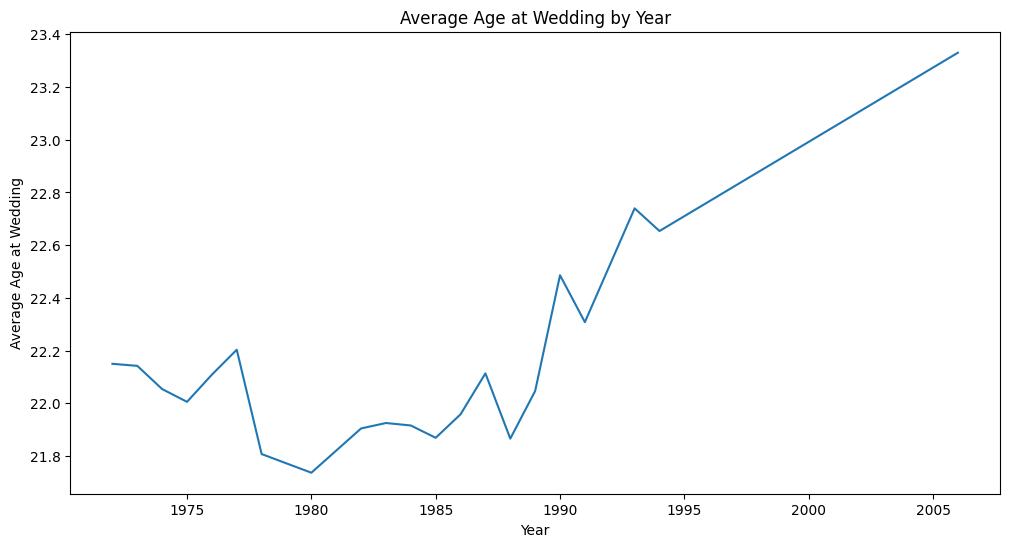

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables you want to save
var_list = ['wrkstat', 'prestige', 'year', 'wrkslf', 'industry', 'agewed']

# Load the dataset
df = pd.read_csv('selected_gss_data.csv', usecols=var_list, low_memory=False)

# Replacing NaN values with 'missing' for categorical analysis
df = df.fillna('missing')

# Convert 'missing' string back to NaN for numeric columns (if any exist)
df[['year', 'agewed']] = df[['year', 'agewed']].apply(pd.to_numeric, errors='coerce')

# Filter out rows where 'wrkstat' is 'missing' for the plot
df_filtered = df[df['wrkstat'] != 'missing']

# Calculate the average agewed for each year
avg_agewed_by_year = df_filtered.groupby('year')['agewed'].mean().reset_index()

# Plot the average 'agewed' by 'year'
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_agewed_by_year, x='year', y='agewed')
plt.title('Average Age at Wedding by Year')
plt.xlabel('Year')
plt.ylabel('Average Age at Wedding')
plt.show()



*Figure IV*

This figure shows the average age at wedding through the years. From this data, it seems that the average age was early 20s from 1972-1990, but after 1990 the average age at wedding started increasing dramatically.

Unique values in 'wrkslf': ['someone else' 'missing' 'self-employed']
Filtered rows for 1972 and 2022:
   year        wrkslf
0  1972  someone else
1  1972  someone else
2  1972  someone else
3  1972  someone else
4  1972  someone else
After mapping 'wrkslf':
   year  wrkslf
0  1972     0.0
1  1972     0.0
2  1972     0.0
3  1972     0.0
4  1972     0.0
Grouped data for self-employed vs others:
 wrkslf   0.0  1.0
year             
1972    1299  149
2022    3013  393


<ipython-input-82-ae27d8647e4d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_years['wrkslf'] = df_filtered_years['wrkslf'].apply(lambda x: 1 if 'self-employed' in str(x).lower() else (0 if 'someone else' in str(x).lower() else None))


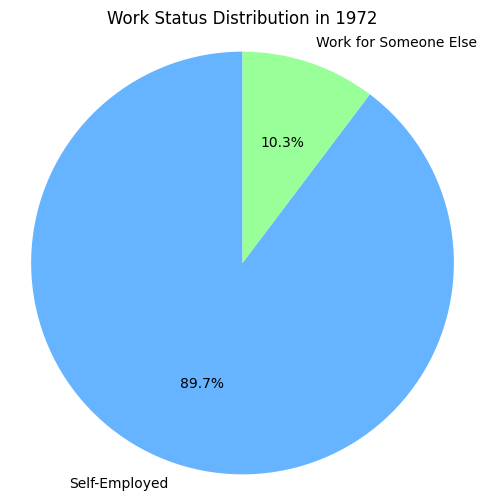

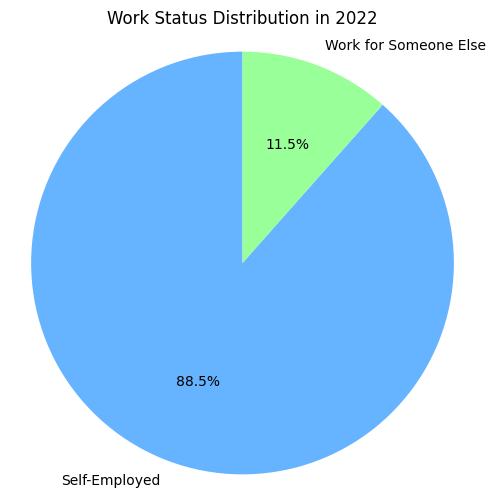

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replacing NaN values with 'missing' for categorical analysis
df = df.fillna('missing')

# Check unique values in 'wrkslf' to ensure we can map it correctly
print("Unique values in 'wrkslf':", df['wrkslf'].unique())

# Filter data for 1972 and 2022
df_filtered_years = df[df['year'].isin([1972, 2022])]

# Check the filtered data for 'wrkslf'
print(f"Filtered rows for 1972 and 2022:\n{df_filtered_years[['year', 'wrkslf']].head()}")

# Map 'wrkslf' to numeric: 'self-employed' -> 1, 'someone else' -> 0
df_filtered_years['wrkslf'] = df_filtered_years['wrkslf'].apply(lambda x: 1 if 'self-employed' in str(x).lower() else (0 if 'someone else' in str(x).lower() else None))

# Verify that the mapping worked correctly
print(f"After mapping 'wrkslf':\n{df_filtered_years[['year', 'wrkslf']].head()}")

# Filter for self-employed vs. work for someone else
self_employed_vs_others = df_filtered_years.groupby(['year', 'wrkslf']).size().unstack().fillna(0)

# Check the grouped data
print("Grouped data for self-employed vs others:\n", self_employed_vs_others)

# Create a pie chart for each year
for year in [1972, 2022]:
    if year in self_employed_vs_others.index:
        plt.figure(figsize=(6, 6))
        data = self_employed_vs_others.loc[year]
        labels = ['Self-Employed', 'Work for Someone Else']
        plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
        plt.title(f"Work Status Distribution in {year}")
        plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
        plt.show()
    else:
        print(f"No data available for {year}")


*Figure V*

These pie charts shows the % of people who were self-employed vs worked for an organisation in 1972 and 2022. It appears that there was no significant change in this % of this population between 1972 and 2022. It remains around 10%.

<Figure size 1200x800 with 0 Axes>

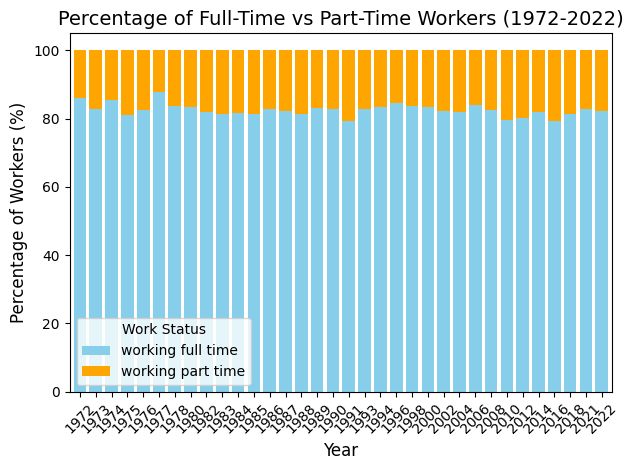

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('selected_gss_data.csv', low_memory=False)

# Replacing NaN values with 'missing' for categorical analysis
df = df.fillna('missing')

# Filter the data to keep only rows with relevant work status (full-time and part-time)
df_filtered = df[df['wrkstat'].isin(['working full time', 'working part time'])]

# Group by year and work status to calculate the count of each work status per year
grouped_data = df_filtered.groupby(['year', 'wrkstat']).size().unstack()

# Calculate percentage of full-time vs part-time for each year
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart
grouped_data_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], width=0.8)

plt.title('Percentage of Full-Time vs Part-Time Workers (1972-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Workers (%)', fontsize=12)
plt.legend(title='Work Status', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to prevent clipping of labels
plt.show()


*Figure VI*

This stacked bar chart shows the % of people who were working full time vs working part time between 1972 and 2022. It appears that there is no significant changes in this % of this population between 1972 and 2022, and the % of part time workers staggers at ~15%.

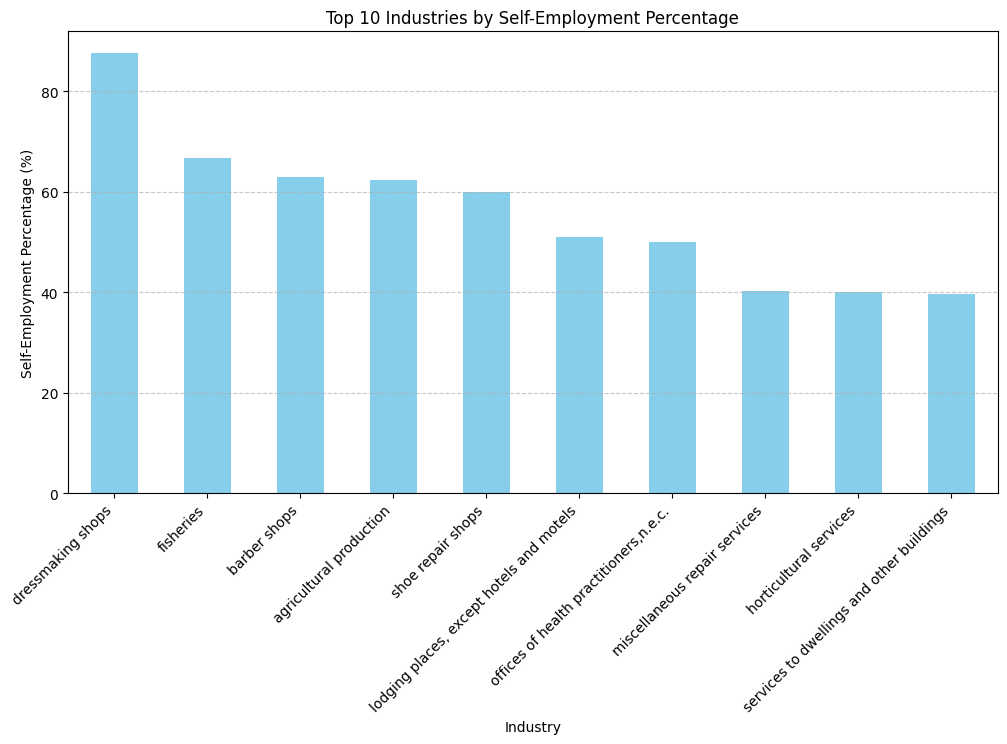

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('selected_gss_data.csv', low_memory=False)

# Replacing NaN values with 'missing' for categorical analysis
df = df.fillna('missing')

# Filter out missing or irrelevant values in 'wrkslf' and 'industry'
df_filtered = df[df['wrkslf'].isin(['self-employed', 'someone else']) & (df['industry'] != 'missing')]

# Group by industry and work status, then calculate counts
industry_counts = df_filtered.groupby(['industry', 'wrkslf']).size().unstack()

# Calculate self-employment percentage per industry
industry_counts['self_employed_pct'] = (industry_counts['self-employed'] / industry_counts.sum(axis=1)) * 100

# Select the top 10 industries by self-employment percentage
top_10_industries = industry_counts.nlargest(10, 'self_employed_pct')

# Plot the data
plt.figure(figsize=(12, 6))
top_10_industries['self_employed_pct'].plot(kind='bar', color='skyblue')

plt.title('Top 10 Industries by Self-Employment Percentage')
plt.xlabel('Industry')
plt.ylabel('Self-Employment Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


*Figure VII*

This bar chart shows the top 10 industries by self-employement percentage. The biggest industries are dressmaking shops, fisheries, barber shops, agricultural production, shoe repair shops, lodging places (except hotels and motels), offices of health practioners, miscellaneous repair services, horticultural services, and services to dwellings and other buildings.

**5. Describe your findings in 1-2 pages.**



The job market has undergone significant shifts over the past decades, influenced by economic changes, societal values, and workforce participation trends. Examining job prestige, employment patterns, and self-employment rates over time provides valuable insights into how American work culture has evolved.

**1. Workforce Participation and Economic Influences**

From 1972 to 1990, full-time workforce participation steadily increased, as seen in Figure I. This upward trend suggests a growing American economy with expanding job opportunities. However, after 1990, there was a noticeable spike in full-time employment, which could be attributed to economic growth and in particular, the .com boom which took the world by storm.
This upward trajectory continued until 2008, when the global financial crisis caused a sharp decline in employment. The Great Recession led to widespread layoffs and hiring freezes, severely impacting the workforce. Despite this setback, full-time employment has been steadily recovering since then. There was another slight dip in 2020 due to the COVID-19 pandemic, where people were once again laid off due to recession.

**2. Industry Prestige and Changing Values**

Public perception of job prestige has evolved alongside societal values. Figure II illustrates the top 10 most prestigious industries in 1972, which included religious organizations, schools, and aid agencies. These industries were regarded highly due to their perceived altruism and contribution to the public good. During this time, professions associated with community service and education were seen as noble pursuits.
However, over time, shifts in technological advancements and economic priorities have altered the perception of prestige. While industries such as finance, technology, and medicine may be considered prestigious today, the emphasis on altruism that characterized 1972 has diminished within our American society.

**3. Job Prestige and Marriage Trends**

One interesting area of analysis is the relationship between job prestige and age at marriage. Figure III indicates that there is no strong correlation (0.15) between the age at which someone gets married and the prestige of the job they ultimately pursue. This suggests that career paths are influenced by factors independent of marital decisions.
In contrast, Figure IV highlights a clear trend in marriage ages. From 1972 to 1990, the average age at marriage remained in the early 20s. However, post-1990, the average age at marriage increased significantly.This delay in marriage age coincides with changing workforce expectations. More individuals are pursuing higher education and career development before settling down. The increasing costs of living and a focus on financial stability may also contribute to this trend, as people prioritize professional growth before marriage.

**4. Self-Employment and Organizational Employment Trends**

One of the more consistent aspects of employment over time is the proportion of self-employed individuals versus those working for organizations. Figure V shows that the percentage of self-employed individuals has remained stable at around 10% from 1972 to 2022. Despite changes in job availability and industry shifts, the proportion of those opting for self-employment has not fluctuated significantly.
Similarly, Figure VI presents data on the percentage of full-time versus part-time workers between 1972 and 2022. This data indicates that the proportion of part-time workers has remained steady at approximately 15%. The stability in both self-employment and part-time work suggests that despite economic fluctuations, the fundamental structure of employment in terms of work type has remained relatively unchanged.

**5. Industries with High Self-Employment Rates**

Certain industries are more conducive to self-employment than others. Figure VII outlines the top 10 industries with the highest self-employment percentages. These include dressmaking shops, fisheries, barber shops, agricultural production, shoe repair shops, lodging places (excluding hotels and motels), offices of health practitioners, miscellaneous repair services, horticultural services, and services to dwellings and buildings. Many of these industries require specialized skills and cater to niche markets, making them well-suited for independent work.
The dominance of these industries in self-employment highlights the role of small businesses and trade-based professions in the economy. While large corporations continue to dominate the job market, small businesses remain a vital component, offering a more flexible path to individuals who may prefer it.

**Conclusion**

Overall, job trends over the past 50 years reveal a complex relationship between economic forces, societal values, and individual career choices. The significant transformations in society during this period have influenced the workforce into what it is today.
